In [1]:
#Importing needed libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")#setting grid for all plots

# Refining the search for a suitable ML models

In [12]:
# Loading the dataset:
df = pd.read_csv('..\\Datasets_data.cso.ie\\PEA20.20231004T131025.csv')

In [13]:
df.head()

,STATISTIC Label,Year,Principal Economic Status,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration Aged 15 Years and Over (Pe...,2009,All persons,Both sexes,Net migration,Thousand,-0.5
1,Estimated Migration Aged 15 Years and Over (Pe...,2009,All persons,Both sexes,Emigrants: All destinations,Thousand,69.7
2,Estimated Migration Aged 15 Years and Over (Pe...,2009,All persons,Both sexes,Immigrants: All origins,Thousand,69.1
3,Estimated Migration Aged 15 Years and Over (Pe...,2009,All persons,Male,Net migration,Thousand,-6.2
4,Estimated Migration Aged 15 Years and Over (Pe...,2009,All persons,Male,Emigrants: All destinations,Thousand,40.8


# EDA

In [14]:
df.dtypes

STATISTIC Label               object
Year                           int64
Principal Economic Status     object
Sex                           object
Inward or Outward Flow        object
UNIT                          object
VALUE                        float64
dtype: object

In [15]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
df_col_drop = ['STATISTIC Label','UNIT']
df.drop(df_col_drop ,axis=1, inplace=True)
# Renaming the columns
df = df.rename(columns={'Principal Economic Status': 'Economic_Status','Inward or Outward Flow':'Inward_or_Outward_Flow','VALUE':'Population'})
# Dropping rows based on criteria these are distorting the dataset, we have subcategories hence subtotals in the df.
df = df[~((df['Sex'] == 'Both sexes') | (df['Inward_or_Outward_Flow'] == 'Net migration') | (df['Economic_Status'] == 'All persons'))]

df['Population'] = df['Population'].apply(lambda x: x * 1000)

In [16]:
df

,Year,Economic_Status,Sex,Inward_or_Outward_Flow,Population
13,2009,Persons at work,Male,Emigrants: All destinations,25600.0
14,2009,Persons at work,Male,Immigrants: All origins,18800.0
16,2009,Persons at work,Female,Emigrants: All destinations,15700.0
17,2009,Persons at work,Female,Immigrants: All origins,14900.0
22,2009,All unemployed persons,Male,Emigrants: All destinations,7700.0
...,...,...,...,...,...
620,2022,Student or pupil,Female,Immigrants: All origins,4800.0
625,2022,Other economic status,Male,Emigrants: All destinations,1800.0
626,2022,Other economic status,Male,Immigrants: All origins,3000.0
628,2022,Other economic status,Female,Emigrants: All destinations,2600.0


In [17]:
# Looking up distinct values within the df:
def df_distinct(df):
    for column in df:
        unique_values = df[column].unique()
        print(f"Unique values for {column}:")
        print(unique_values)
        print("\n")

# Calling the function.
df_distinct(df)

Unique values for Year:
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Unique values for Economic_Status:
['Persons at work' 'All unemployed persons' 'Student or pupil'
 'Other economic status']


Unique values for Sex:
['Male' 'Female']


Unique values for Inward_or_Outward_Flow:
['Emigrants: All destinations' 'Immigrants: All origins']


Unique values for Population:
[25600. 18800. 15700. 14900.  7700.  9800.  3200.  5800.  6000.  3800.
  6500.  5900.  1500.  2100.  3500.  8000. 18200.  9600. 12900.  8700.
 13200.  4800.  3700.  6900.  2600.  7300.  1300.  1900.  4200.  5100.
 18300. 11900. 17900. 11300. 10900.  5200.  4300.  4500.  8400.  9100.
  1700.  1600.  4700. 12600. 15600. 12000.  6200.  4400.  9000.  8500.
  2300.  3300.  5700. 16100. 15200. 11100. 10400.  3100.  7400.  7200.
   800. 12300. 13700.  6800. 12700.  9500. 12100.  8800.  2800.  6600.
 16000.  5000.  2900.  7800.  9700.  8900.  1000.  4000. 22800. 11200.
  2500.  5500. 23800.  4100.  760

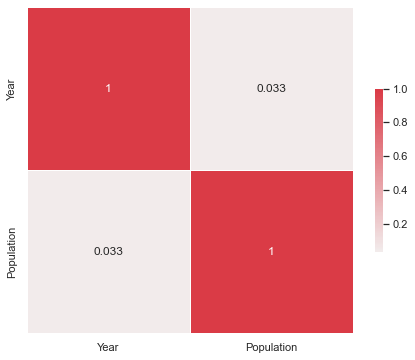

In [18]:
# # Compute the correlation matrix
# corr = df.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(8, 6))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, annot=True, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# # Show the plot
# plt.show()


In [7]:
# # For categorical variables, you might need to encode them
# label_encoder = LabelEncoder()
# categorical_columns = ['Economic_Status', 'Sex', 'Inward_or_Outward_Flow', 'Population']
# for col in categorical_columns:
#     df[col] = label_encoder.fit_transform(df[col])

# # Split the data into training and testing sets
# X = df.drop(['Population'], axis=1)
# y = df['Population']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # We are going to use Linear Regression Random Forest and Gradient Boosting
# models = {
#     'Linear Regression': LinearRegression(),
#     'Decision Tree': DecisionTreeRegressor(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor()
# }

# # Tuning the hyperparameter for each model using GridSearchCV or RandomizedSearchCV
# for name, model in models.items():
#     if name == 'Linear Regression':
#         # Linear regression fitting
#         model.fit(X_train, y_train)
#     else:
#         # Hyperparameter tuning for other models
#         param_grid = {}  # Adding appropriate parameters for each model
#         if name == 'Random Forest':
#             model = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100)
#         elif name == 'Gradient Boosting':
#             model = GridSearchCV(model, param_grid=param_grid)
#         model.fit(X_train, y_train)

#     # Evaluate the performance of each model on the test set
#     predictions = model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     print(f"Model: {name}, Mean Squared Error: {mse}")


Model: Linear Regression, Mean Squared Error: 1110.3877449482022
Model: Random Forest, Mean Squared Error: 184.28683111111116
Model: Gradient Boosting, Mean Squared Error: 261.89097315370805


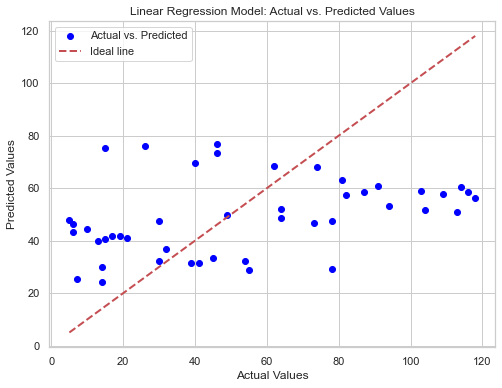

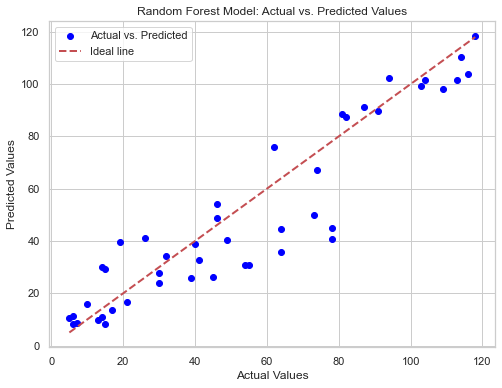

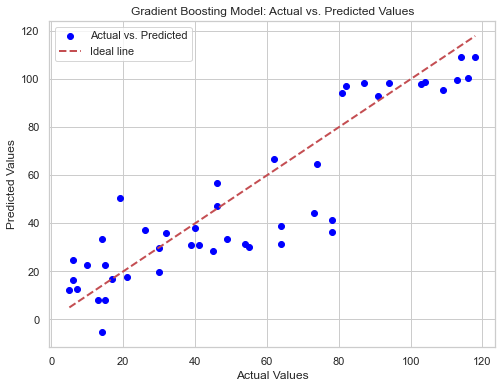

In [8]:
import matplotlib.pyplot as plt

# Plotting the actual values and the predicted values for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Ideal line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Model: Actual vs. Predicted Values')
    plt.legend(loc='upper left')
    plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 13 to 629
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Year                    224 non-null    int64
 1   Economic_Status         224 non-null    int32
 2   Sex                     224 non-null    int32
 3   Inward_or_Outward_Flow  224 non-null    int32
 4   Population              224 non-null    int64
dtypes: int32(3), int64(2)
memory usage: 7.9 KB


In [11]:
df

,Year,Economic_Status,Sex,Inward_or_Outward_Flow,Population
13,2009,2,1,0,119
14,2009,2,1,1,111
16,2009,2,0,0,101
17,2009,2,0,1,98
22,2009,0,1,0,61
...,...,...,...,...,...
620,2022,3,0,1,36
625,2022,1,1,0,7
626,2022,1,1,1,19
628,2022,1,0,0,15
